# **Load Dataset 📁**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the train and test dataset
train = pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("//kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv")

In [5]:
df=pd.read_csv('/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')

# **Show Dataset**

In [61]:
df.head()
df.info()
X.shape, train.shape, test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


((614, 11), (614, 14), (367, 13))

In [7]:
df.drop('Loan_ID' , axis=1 , inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# **Data Visualization 📊**

 **Loan Status Distribution**

<Axes: title={'center': 'Loan Status Distribution'}, ylabel='count'>

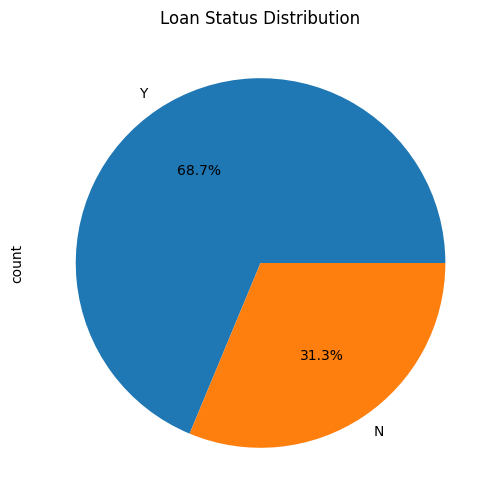

In [11]:
train['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), title='Loan Status Distribution')

**Property Area vs Loan Status**

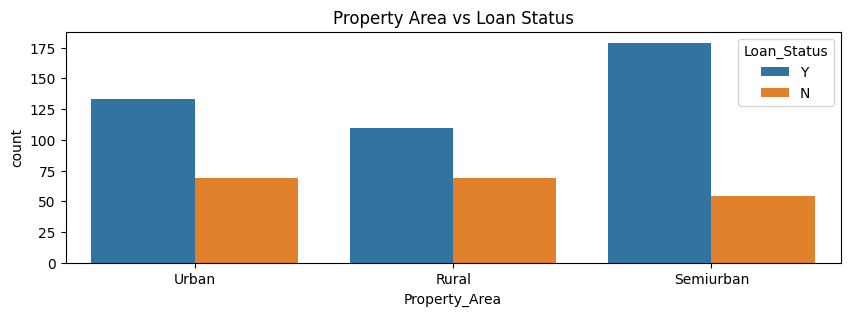

In [12]:
plt.figure(figsize=(10,3))
sns.countplot(x='Property_Area', hue='Loan_Status' , data=df)
plt.title('Property Area vs Loan Status')
plt.show()

**Education vs Loan Status**

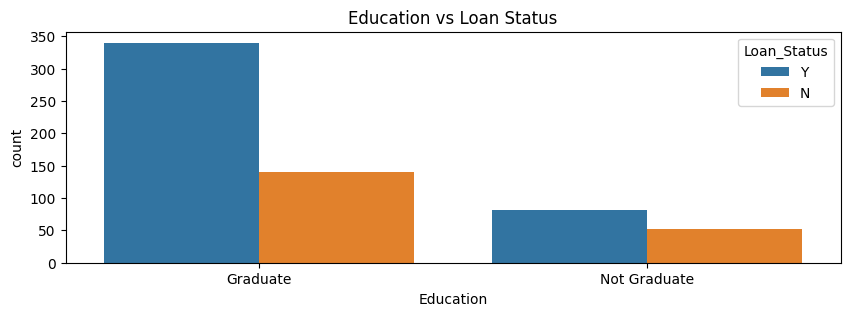

In [13]:
plt.figure(figsize=(10,3))
sns.countplot(x='Education', hue='Loan_Status' , data=df)
plt.title('Education vs Loan Status')
plt.show()

**Credit History vs Loan Status**

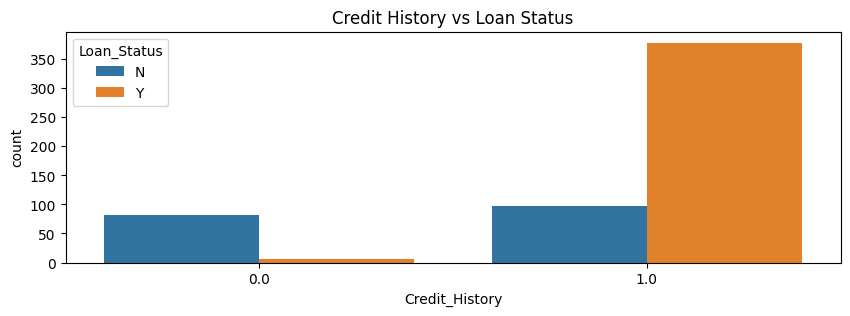

In [14]:
plt.figure(figsize=(10,3))
sns.countplot(x='Credit_History', hue='Loan_Status' , data=df)
plt.title('Credit History vs Loan Status')
plt.show()

**Applicant Income by Education**

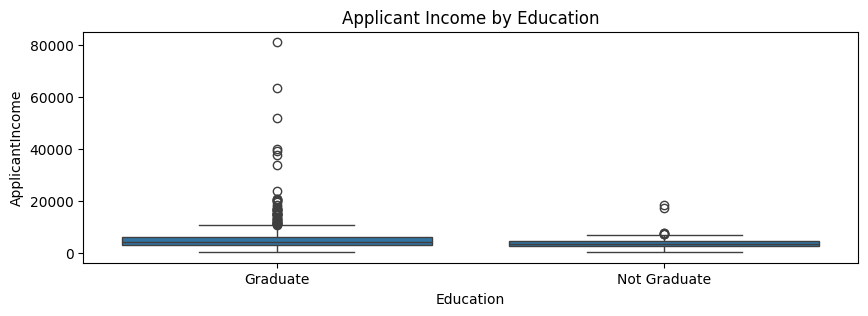

In [15]:
plt.figure(figsize=(10,3))
sns.boxplot(x="Education" , y="ApplicantIncome" , data=df)
plt.title('Applicant Income by Education')
plt.show()


**Loan Amount by Loan Status**

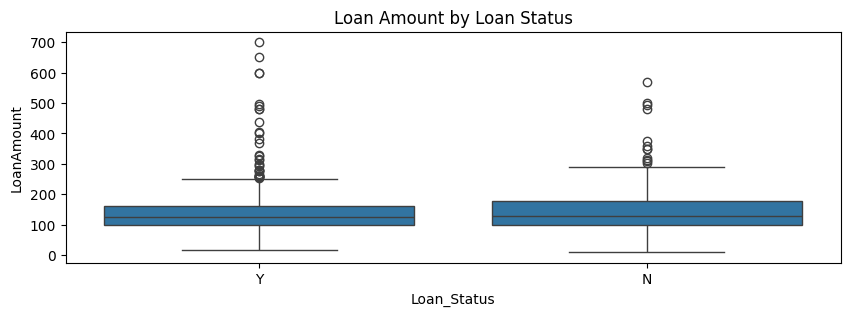

In [17]:
plt.figure(figsize=(10,3))
sns.boxplot(x="Loan_Status" , y="LoanAmount" , data=df)
plt.title('Loan Amount by Loan Status')
plt.show()

**Correlation Heatmap**

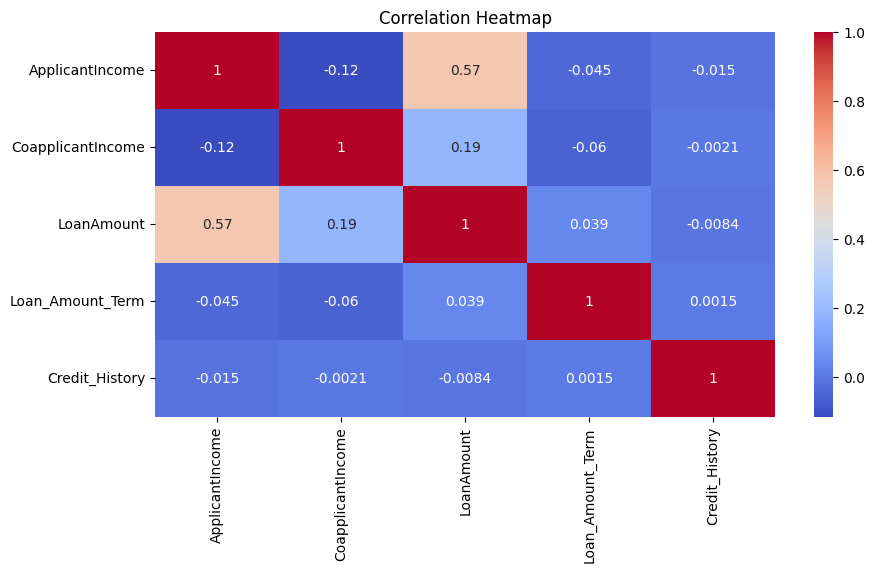

In [18]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(corr , annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Pair Plot**

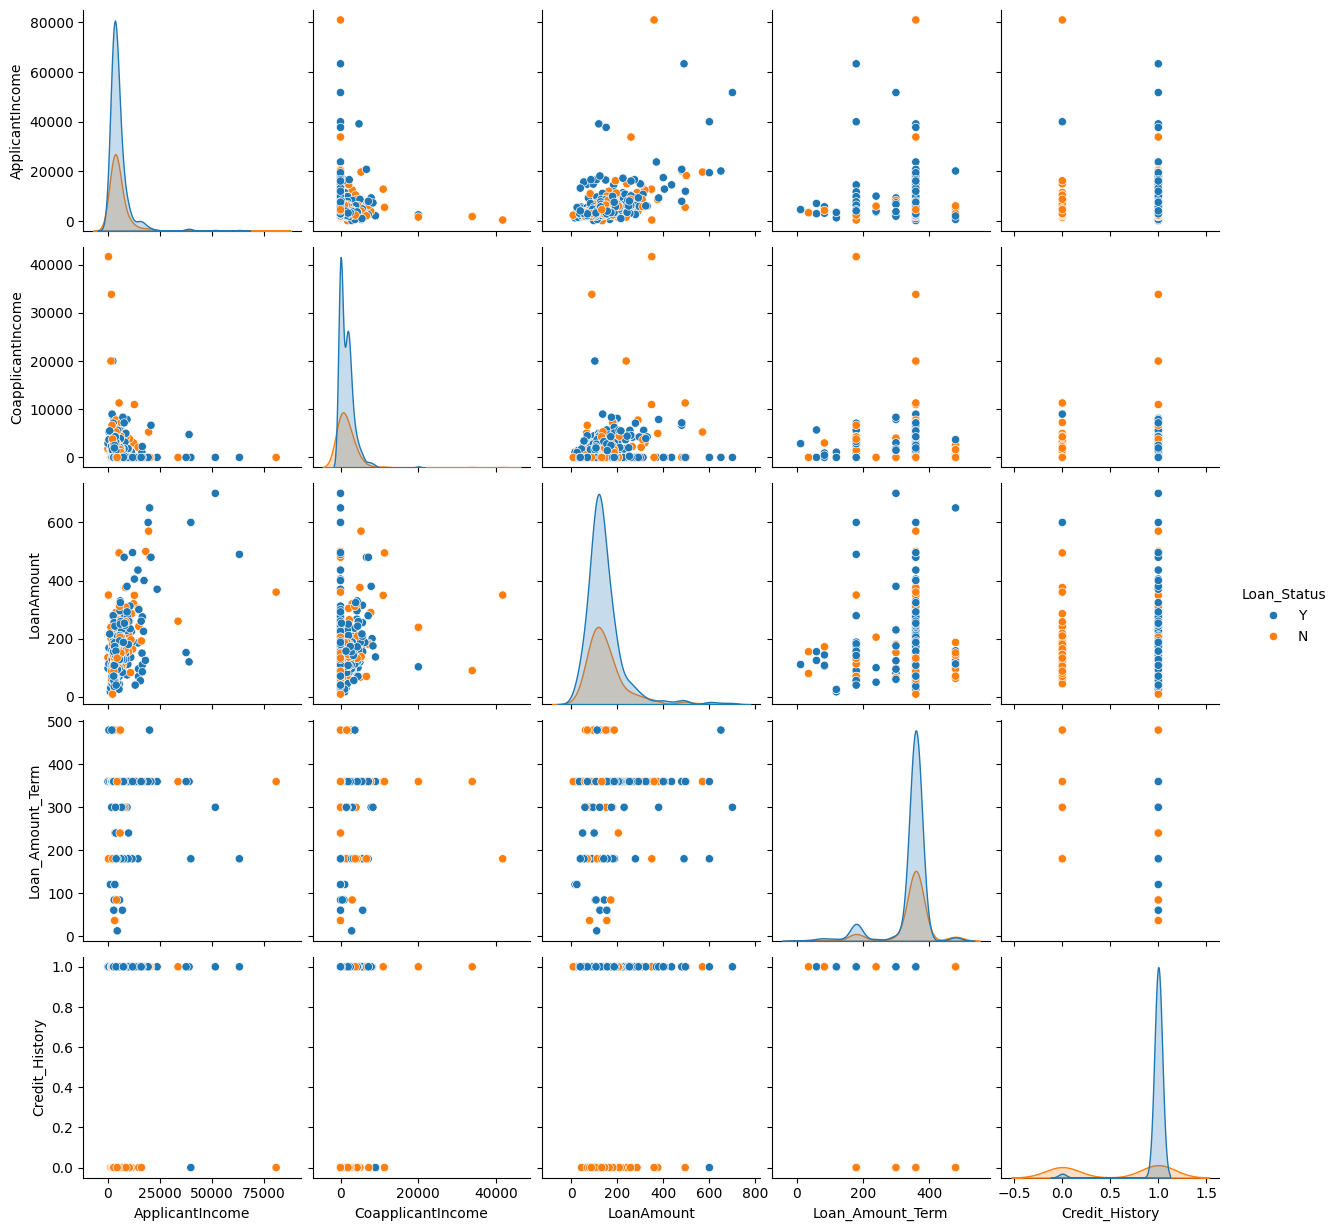

In [19]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
sns.pairplot(df[numerical_cols + ['Loan_Status']], hue='Loan_Status')
plt.show()

**Income vs Loan Amount**

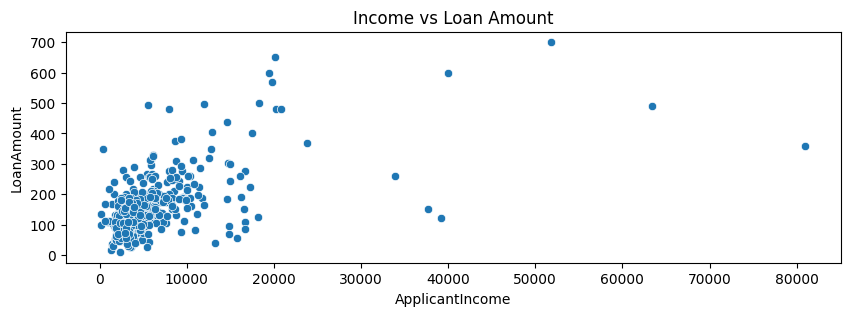

In [21]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='ApplicantIncome' , y='LoanAmount', data=df)
plt.title('Income vs Loan Amount')
plt.show()

**Fill missing values 🧹**

In [22]:
# check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
# replace missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

# **Before Log Transformation**

In [25]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0]
                                 , inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Text(0.5, 1.0, 'Test')

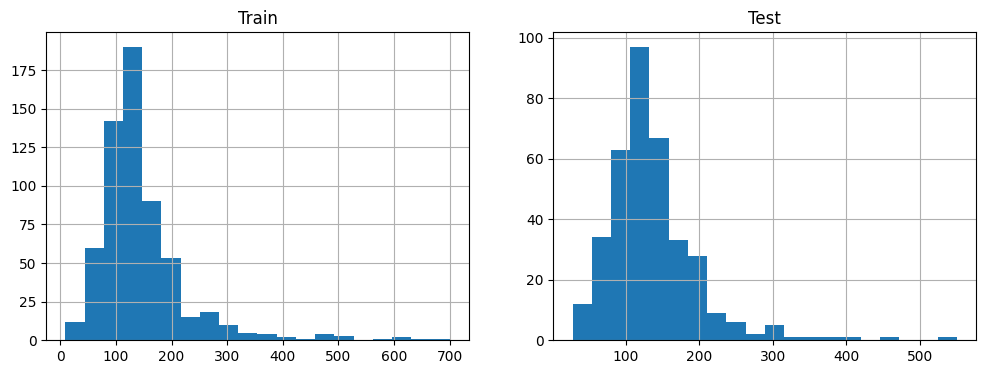

In [26]:
# before log transformation

ax1 = plt.subplot(121)
train['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

# **Removing Skewness And After Log Transformation**

In [27]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Text(0.5, 1.0, 'Test')

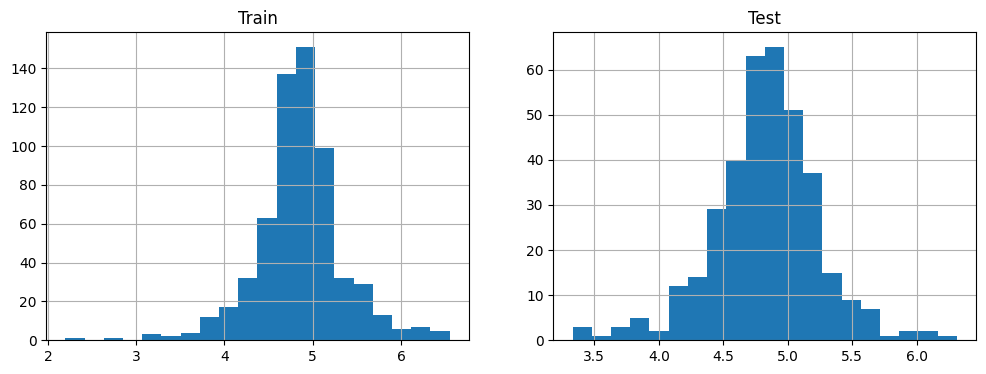

In [28]:
# after log transformation

ax1 = plt.subplot(121)
train['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount_log'].hist(bins=20)
ax2.set_title("Test")

# **Feature Engineering**

In [47]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0] , inplace=True)

In [48]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col].fillna(df[col].mode()[0] , inplace=True)
    else:
        df[col].fillna(df[col].median() , inplace=True)

In [49]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

# **Train-Test Split & Model Training**

In [53]:
X=df.drop('Loan_Status' , axis=1)
y=df['Loan_Status']

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit and transform only the training features
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test features using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames (optional but good practice)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# **Apply Random Forest Classifier**

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

rf=RandomForestClassifier()
rf.fit(X_train , y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Testing Accuracy**

In [68]:
y_pred=rf.predict(X_test)

print(accuracy_score(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

0.7804878048780488
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

[[18 25]
 [ 2 78]]


**Training Accuracy**

In [69]:
y_pred_train=rf.predict(X_train)

print(accuracy_score(y_train , y_pred_train))
print(classification_report(y_train , y_pred_train))
print(confusion_matrix(y_train , y_pred_train))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       342

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491

[[149   0]
 [  0 342]]


**Save the Model**

In [94]:
import joblib
joblib.dump(RandomForestClassifier, 'loan_model.pkl')


['loan_model.pkl']

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=12, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=20; total time=   0.1s
[CV] END max_depth=20, max_features=log2

**Plot Training vs Testing Performance**

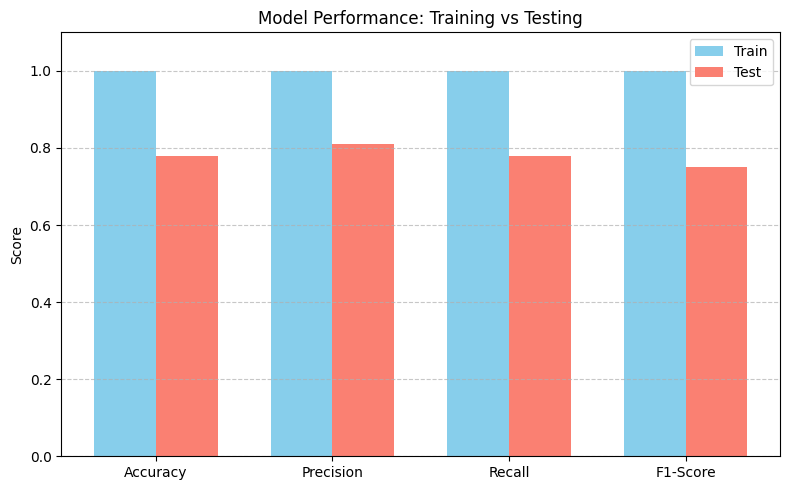

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Metric values (using weighted averages)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_scores = [1.00, 1.00, 1.00, 1.00]
test_scores = [0.78, 0.81, 0.78, 0.75]

x = np.arange(len(metrics))  # label locations
width = 0.35  # bar width

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
plt.bar(x + width/2, test_scores, width, label='Test', color='salmon')

# Labeling
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.title('Model Performance: Training vs Testing')
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Confusion Matrix**

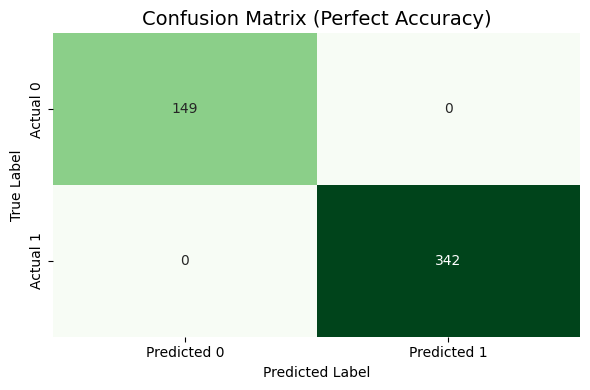

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define your confusion matrix
cm = np.array([[149, 0],
               [0, 342]])

# Labels for axes
labels = ['Class 0', 'Class 1']

# Plotting
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix (Perfect Accuracy)', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


# **Apply Grid Search CV** 

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20,],
    'max_depth': [None, 5, 10,],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf': [1, 2, 4,6,8,10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2 ,scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 20}
Best Score: 0.8186559472273757
Test Accuracy: 0.7804878048780488

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123


Confusion Matrix:
 [[18 25]
 [ 2 78]]


In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define parameter grid
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Run Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Estimator
best_rf = grid_search.best_estimator_

# Predictions
y_train_pred = best_rf.predict(X_train)

# Training Accuracy
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# Best Parameters from Grid Search
print("\n✅ Best Parameters from GridSearchCV:", grid_search.best_params_)
print("✅ Cross-Validated Training Score (mean CV accuracy):", grid_search.best_score_)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=15, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=15, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=15, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=1

**Save The Model**

In [98]:
import joblib
joblib.dump(GridSearchCV, 'loan_model.pk2')


['loan_model.pk2']

**Confusion Matrix**

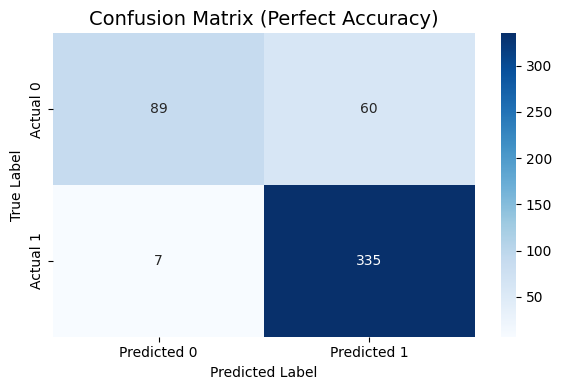

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define your confusion matrix
cm = np.array([[89, 60],
               [7, 335]])

# Labels for axes
labels = ['Class 0', 'Class 1']

# Plotting
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix (Perfect Accuracy)', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


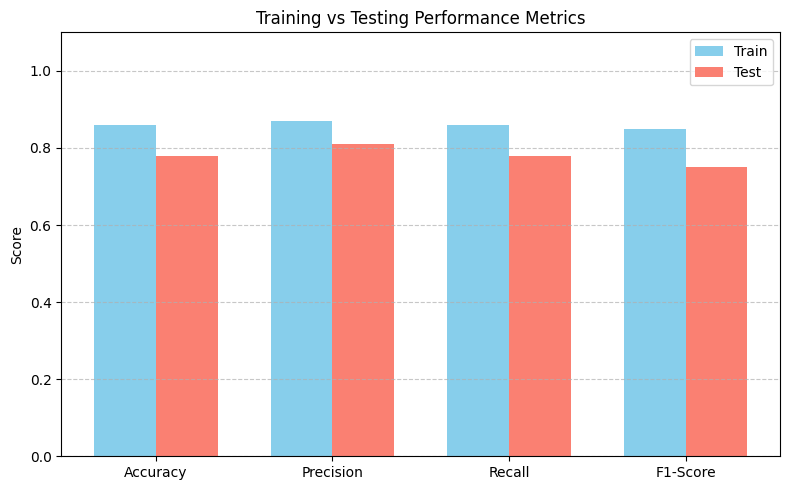

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Scores from your results
train_scores = [0.86, 0.87, 0.86, 0.85]   # From training classification report
test_scores  = [0.78, 0.81, 0.78, 0.75]   # From testing classification report

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
plt.bar(x + width/2, test_scores, width, label='Test', color='salmon')

# Labeling
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.title('Training vs Testing Performance Metrics')
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


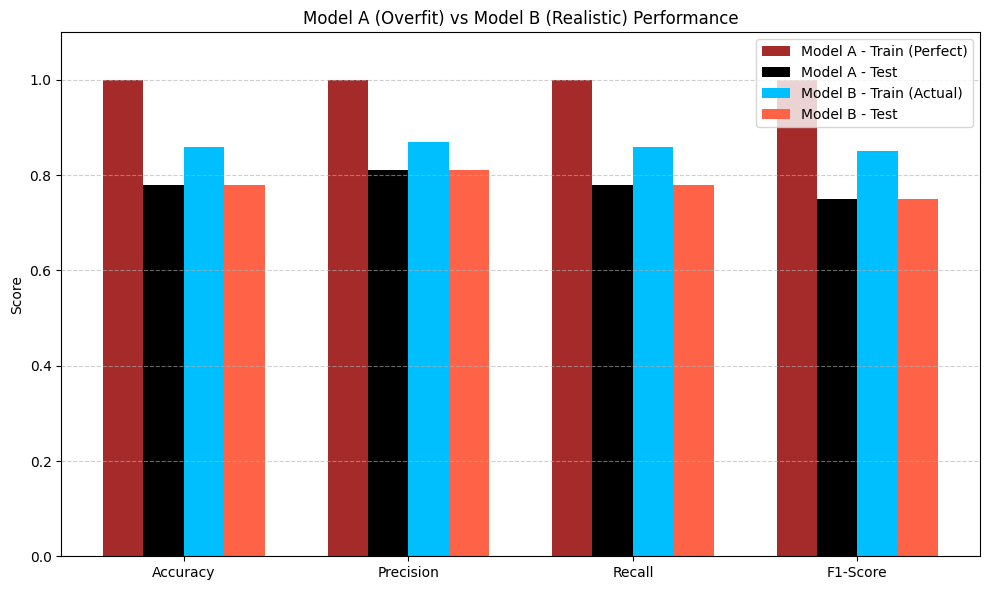

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics to compare
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))  # x-axis positions

# Model A (Idealized overfit example)
modelA_train = [1.00, 1.00, 1.00, 1.00]
modelA_test  = [0.78, 0.81, 0.78, 0.75]

# Model B (Actual GridSearchCV model)
modelB_train = [0.86, 0.87, 0.86, 0.85]
modelB_test  = [0.78, 0.81, 0.78, 0.75]

bar_width = 0.18

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*bar_width, modelA_train, width=bar_width, label='Model A - Train (Perfect)', color='brown')
plt.bar(x - 0.5*bar_width, modelA_test, width=bar_width, label='Model A - Test', color='black')
plt.bar(x + 0.5*bar_width, modelB_train, width=bar_width, label='Model B - Train (Actual)', color='deepskyblue')
plt.bar(x + 1.5*bar_width, modelB_test, width=bar_width, label='Model B - Test', color='tomato')

# Labels and formatting
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.title('Model A (Overfit) vs Model B (Realistic) Performance')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
